# Jupyter Notebook for the exploration and the cleaning of the dataset

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Import dataset

In [14]:
raw_data = pd.read_csv('../data/investments_VC.csv', encoding='ISO-8859-1')

##### First check of the dataset

In [15]:
raw_data.shape

(54294, 39)

In [16]:
raw_data.head(2)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [18]:
raw_data[raw_data['funding_rounds'] == 1 ]['status'].value_counts()

status
operating    27359
closed        1928
acquired      1824
Name: count, dtype: int64

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

##### Observations:
- Shape: 54294 rows, 39 columns
- Columns: 'permalink', 'name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city',   'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'

##### Some value counts

In [20]:
raw_data['status'].value_counts()

status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64

In [21]:
raw_data['country_code'].value_counts()

country_code
USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
       ...  
ALB        1
MOZ        1
LIE        1
BRN        1
MAF        1
Name: count, Length: 115, dtype: int64

In [22]:
# country code = ITA
raw_data[raw_data['country_code'] == 'ITA'].shape[0]

308

In [23]:
raw_data.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [24]:
raw_data[raw_data['country_code'] == 'ITA'].isnull().sum()

permalink                 0
name                      0
homepage_url              7
category_list            34
 market                  34
 funding_total_usd        0
status                    3
country_code              0
state_code              308
region                    0
city                      5
funding_rounds            0
founded_at               82
founded_month            82
founded_quarter          82
founded_year             82
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E             

##### Strip columns' names

In [25]:
raw_data.columns = raw_data.columns.str.strip()

In [26]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

##### Convert fundings_total_usd into float 

In [27]:
raw_data['funding_total_usd'] = raw_data['funding_total_usd'].str.replace(',', '')
raw_data['funding_total_usd'] = raw_data['funding_total_usd'].str.replace('-', '')
raw_data['funding_total_usd'] = raw_data['funding_total_usd'].str.replace(' ', '')
raw_data['funding_total_usd'] = raw_data['funding_total_usd'].str.replace('', '0')
raw_data['funding_total_usd'] = raw_data['funding_total_usd'].astype(float)


In [28]:
raw_data['funding_total_usd']

0        1.070500e+13
1        4.000000e+13
2        4.000000e+09
3        1.050000e+13
4        6.000000e+09
             ...     
54289             NaN
54290             NaN
54291             NaN
54292             NaN
54293             NaN
Name: funding_total_usd, Length: 54294, dtype: float64

In [29]:
raw_data['funding_total_usd'].dtype

dtype('float64')

In [30]:
# Exclude NaN values and check if all remaining values are numeric
non_nan_values = raw_data['funding_total_usd'].dropna()
is_numeric = pd.to_numeric(non_nan_values, errors='coerce').notnull().all()
print(f"All values in 'funding_total_usd' are numeric: {is_numeric}")


All values in 'funding_total_usd' are numeric: True


##### Drop duplicates and some irrelevant columns

In [31]:
raw_data.drop_duplicates(inplace=True)

In [32]:
raw_data.shape
# dropped from 54294 to 49438 rows

(49439, 39)

In [65]:
raw_data = raw_data.drop(columns=['permalink', 'homepage_url', 'category_list', 
                          'founded_quarter', 'post_ipo_equity',  
                          'post_ipo_debt', 'secondary_market'], 
                 axis=1)

#### checking market column as it has lots of categories

In [66]:
raw_data['market'].value_counts()

market
Software                4620
Biotechnology           3688
Mobile                  1983
E-Commerce              1805
Curated Web             1655
                        ... 
Contact Centers            1
Swimming                   1
Retirement                 1
Musical Instruments        1
Rural Energy               1
Name: count, Length: 753, dtype: int64

In [67]:
print("number of unique markets: ", len(raw_data['market'].unique()))

number of unique markets:  754


In [68]:
print("market's with more than 1000 startups: ", raw_data['market'].value_counts()[raw_data['market'].value_counts() > 1000])

market's with more than 1000 startups:  market
Software                4620
Biotechnology           3688
Mobile                  1983
E-Commerce              1805
Curated Web             1655
Enterprise Software     1280
Health Care             1207
Clean Technology        1200
Games                   1182
Hardware + Software     1081
Advertising             1064
Name: count, dtype: int64


<Axes: ylabel='market'>

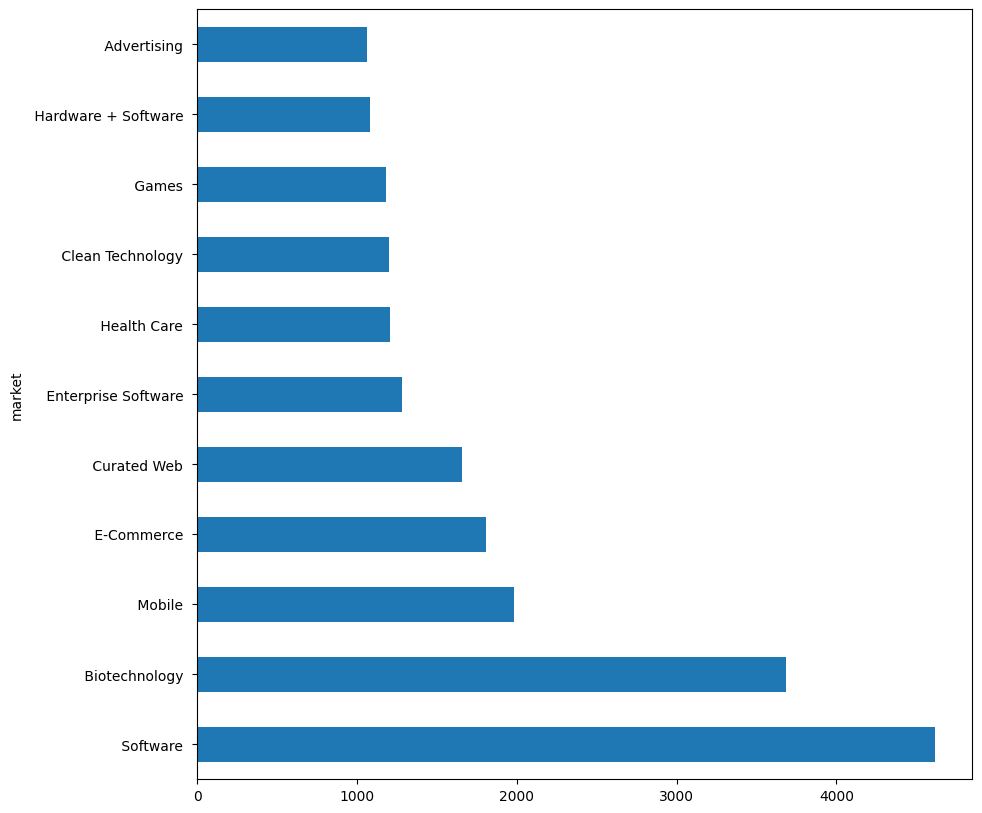

In [69]:

fig, ax = plt.subplots(figsize = (10,10))
raw_data['market'].value_counts()[:11].plot(kind='barh')

In [70]:
print("number of unique regions: ", len(raw_data['region'].unique()))

number of unique regions:  1090


In [71]:
print("market's with more than 1000 startups: ", raw_data['region'].value_counts()[raw_data['region'].value_counts() > 1000])

market's with more than 1000 startups:  region
SF Bay Area      6804
New York City    2577
Boston           1837
London           1588
Los Angeles      1389
Name: count, dtype: int64


<Axes: ylabel='region'>

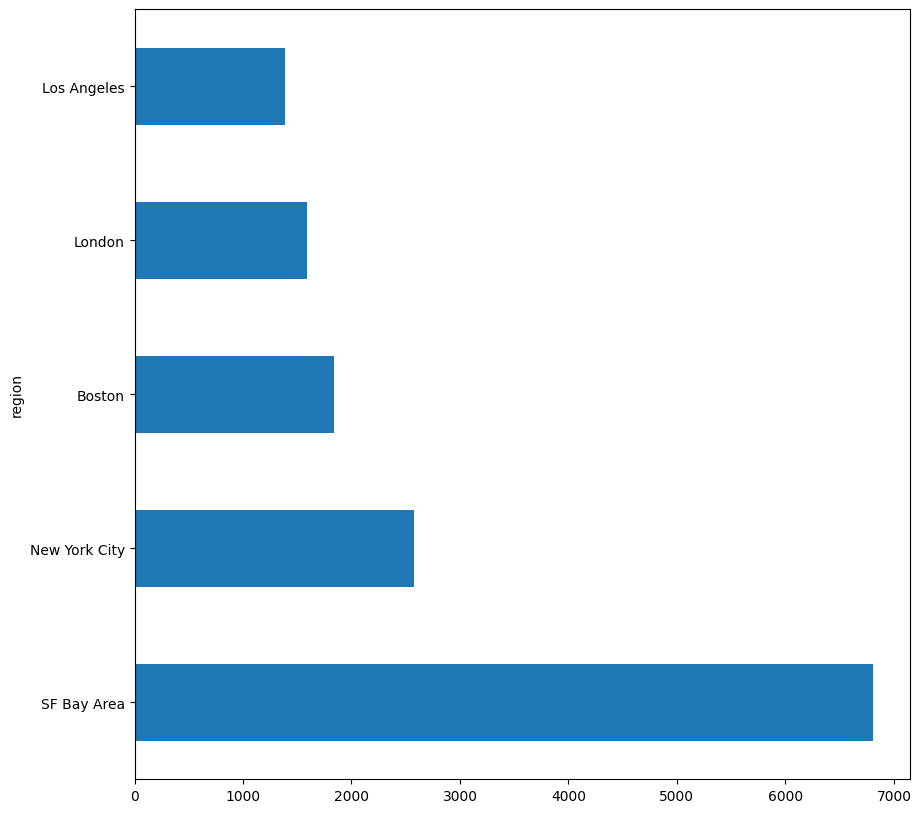

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
raw_data['region'].value_counts()[:5].plot(kind='barh')

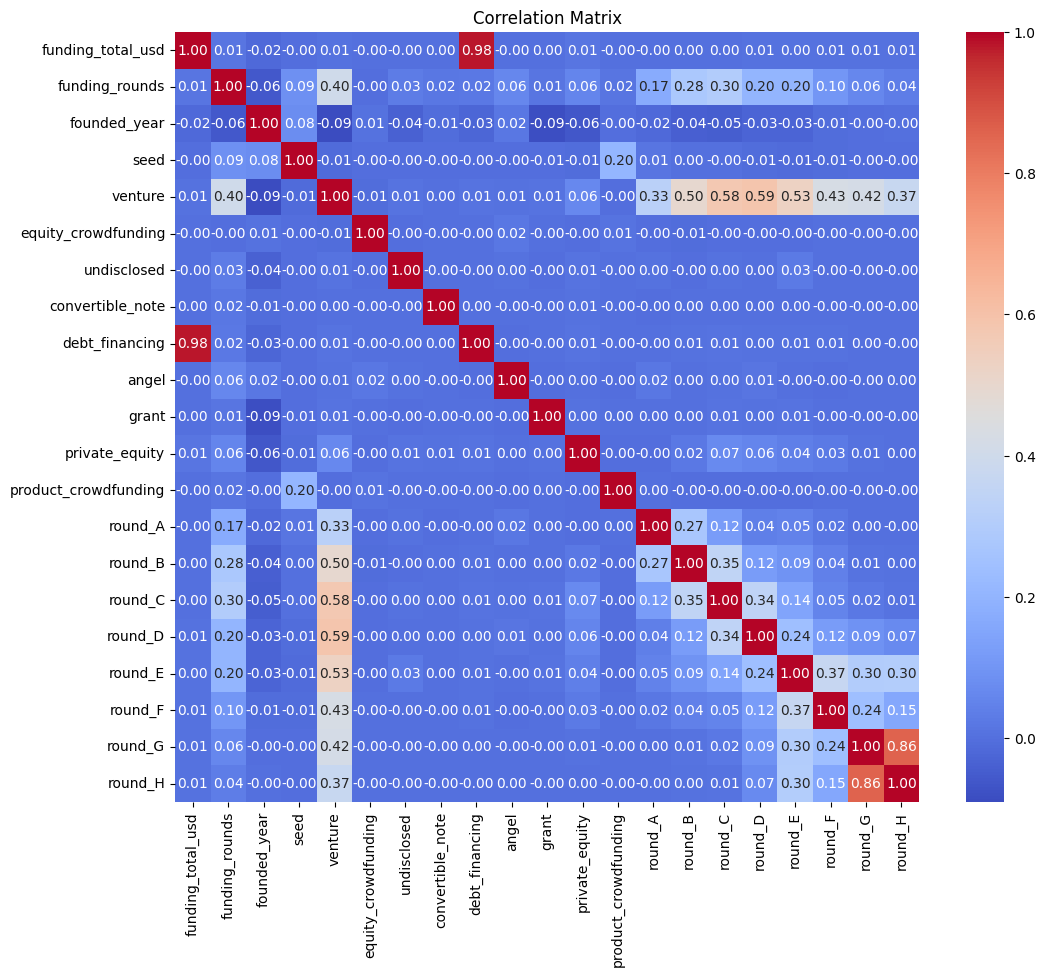

In [73]:
# Select only numeric columns for correlation matrix
numeric_data = raw_data.select_dtypes(include=[np.number])

# Calcola la matrice di correlazione
correlation_matrix = numeric_data.corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [74]:
raw_data["status_enc"] = raw_data["status"].apply(lambda x: 0 if x == "closed" else 1)

In [75]:
raw_data["status_enc"] = raw_data["status"].apply(lambda x: 1 if x == "acquired" else 0)
corr_rax_data = raw_data[raw_data['status'] != 'operating']

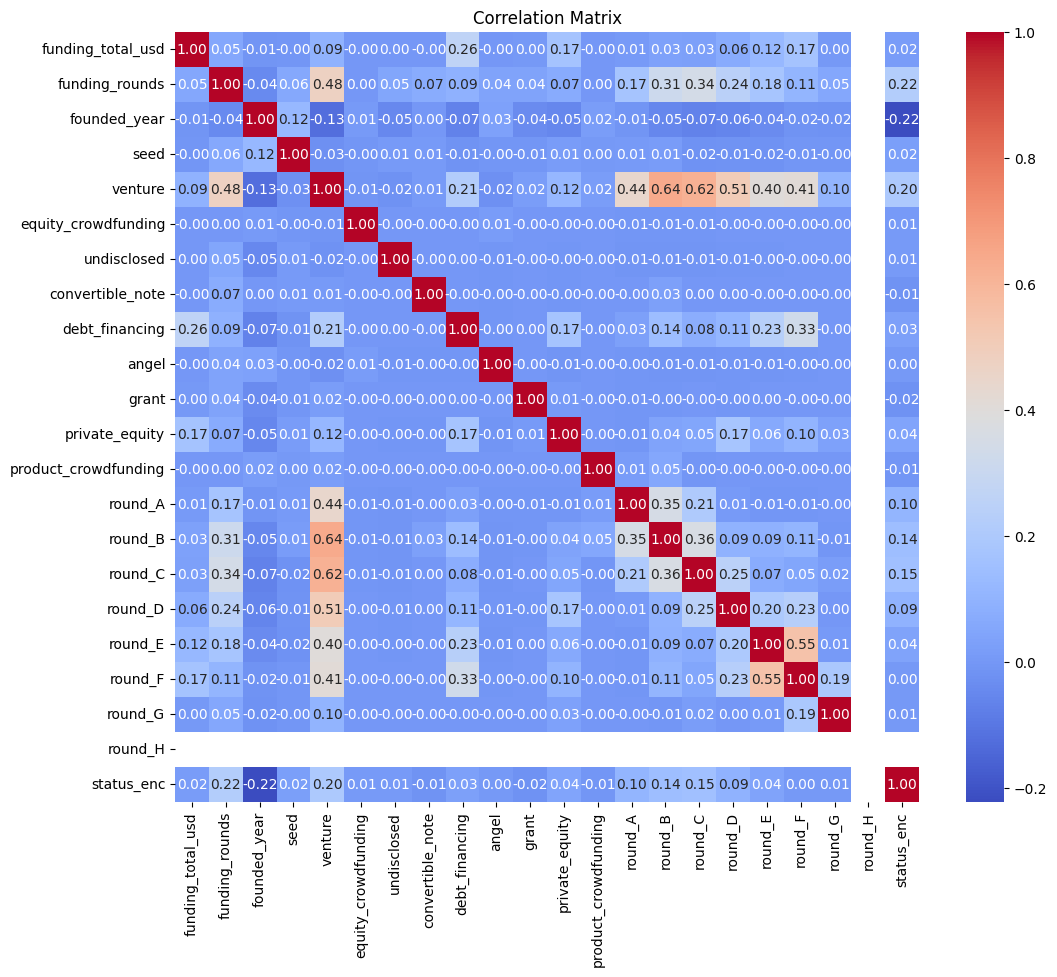

In [76]:
# Select only numeric columns for correlation matrix
numeric_data = corr_rax_data.select_dtypes(include=[np.number])

# Calcola la matrice di correlazione
correlation_matrix = numeric_data.corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

##### Cleaning and feature engineering 

In [77]:
data = raw_data

In [78]:
data.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_year', 'first_funding_at', 'last_funding_at',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'status_enc'],
      dtype='object')

##### Removing missing values from name and status rows. Removing missing values from founded_year since it's an important variable for the model.

In [87]:
data = data.dropna(subset=["status"])
data = data.dropna(subset=["founded_year"])
data = data.dropna(subset=["name"])

In [80]:
data.isnull().sum()

name                        0
market                   1801
funding_total_usd           0
status                      0
country_code             2936
state_code              13332
region                   2936
city                     3357
funding_rounds              0
founded_at                  0
founded_month               0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
status_enc                  0
dtype: int

In [81]:
len(data)

37563

In [82]:
data = data.fillna({"market": "other", "country_code": "other", "region": "other", "city": "other", "state_code": "other"})

In [83]:
data['founded_year'].max()

np.float64(2014.0)

[1902.         1905.86206897 1909.72413793 1913.5862069  1917.44827586
 1921.31034483 1925.17241379 1929.03448276 1932.89655172 1936.75862069
 1940.62068966 1944.48275862 1948.34482759 1952.20689655 1956.06896552
 1959.93103448 1963.79310345 1967.65517241 1971.51724138 1975.37931034
 1979.24137931 1983.10344828 1986.96551724 1990.82758621 1994.68965517
 1998.55172414 2002.4137931  2006.27586207 2010.13793103 2014.        ]


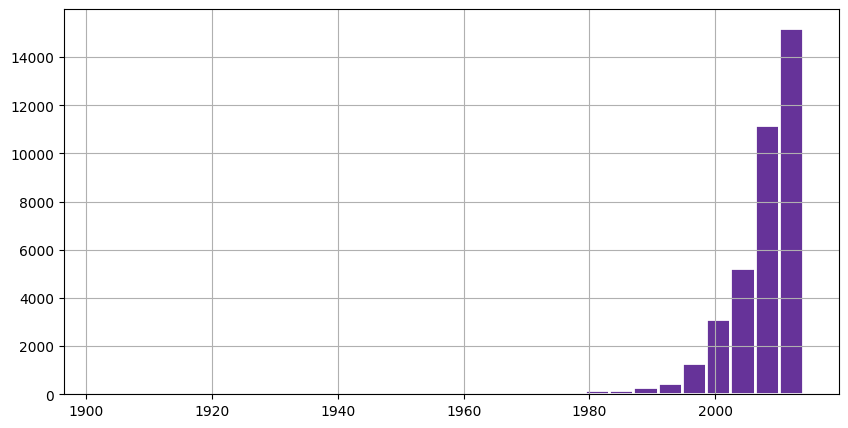

In [84]:
max_val, min_val = data['founded_year'].max(), data['founded_year'].min()
bins_edges = np.linspace(min_val, max_val, 30)
plt.figure(figsize=(10,5))
plt.hist(x=data['founded_year'],
         bins=bins_edges,
         color='rebeccapurple',
         edgecolor='white',
         linewidth=2,)
plt.grid()
print(bins_edges)

In [92]:
#in 30 
#transforming date data "YYYY-MM-DD" in datetime.datetime
data['founded_at'] =  pd.to_datetime(data['founded_at'], format='%Y-%m-%d', errors = 'coerce')
data['first_funding_at'] =  pd.to_datetime(data['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
data['last_funding_at'] =  pd.to_datetime(data['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')
data['founded_year'] =  pd.to_datetime(data['founded_year'], format='%Y', errors = 'coerce')
data['founded_month'] =  pd.to_datetime(data['founded_month'], format='%Y-%m', errors = 'coerce')

In [93]:
data.isna().sum()

name                        0
market                      0
funding_total_usd           0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month           37563
founded_year                0
first_funding_at            6
last_funding_at             2
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
status_enc                  0
dtype: int